# 필요 라이브러리 불러오기

## 라이브러리 불러오기 전
- pip install opencv-python 을 입력하여 설치하기

In [20]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
import numpy as np
import pandas as pd
import cv2
from IPython.display import Image
from os import listdir as ld

# 필요 모델 들고오기 - VGG16

In [21]:
vgg_model = VGG16(weights='imagenet', include_top=False)

## 마지막 컨볼루션 레이어의 출력으로 새 모델 생성

In [22]:
# Create a new model with the output of the last convolutional layer
model = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer('block5_pool').output)

In [23]:
import tensorflow.keras.utils as utils
# import keras.utils as utils #이미지를 불러오기 위해 필요한 package

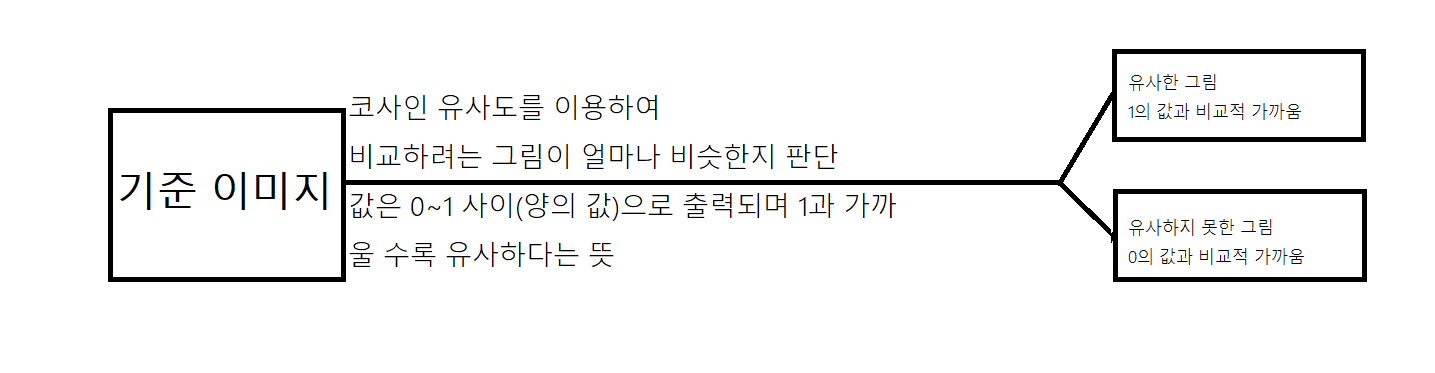

In [64]:
Image('C:/Users/admin/Desktop/simpic/a.png')

# 기준이 될 이미지 불러오기
- 첫 번째 이미지를 로드하고 VGG용으로 사전 처리

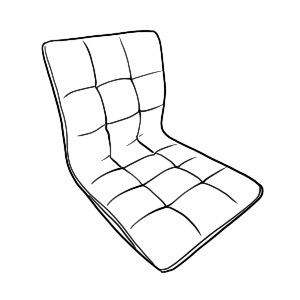

In [11]:
Image("D:\\k-digital\\source\\siamese\chair\\anchor\\s_0007_24864_617392.jpg")

In [24]:
# Load the first image and preprocess it for VGG
img1 = utils.load_img("D:\\k-digital\\source\\siamese\chair\\anchor\\s_0007_24864_617392.jpg", target_size=(224, 224))
img1 = utils.img_to_array(img1)
img1 = np.expand_dims(img1, axis=0)
img1 = preprocess_input(img1)

## 첫 번째 이미지에서 형상 추출

In [25]:
# Extract features from the first image
features1 = model.predict(img1)
features1 = features1.flatten()

# 비교 이미지(positive)불러오기

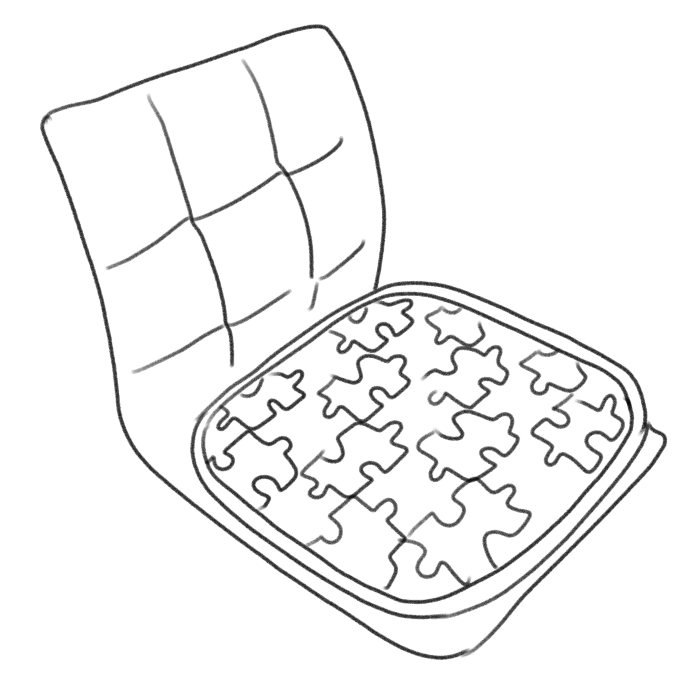

In [26]:
Image("D:\\k-digital\\source\\siamese\\chair\\positive\\s_0007_24787_427588.jpg")

In [27]:
# Load the second image and preprocess it for VGG
img2 = utils.load_img("D:\\k-digital\\source\\siamese\\chair\\positive\\s_0007_24787_427588.jpg", target_size=(224, 224))
img2 = utils.img_to_array(img2)
img2 = np.expand_dims(img2, axis=0)
img2 = preprocess_input(img2)

In [28]:
# Extract features from the second image
features2 = model.predict(img2)
features2 = features2.flatten()

In [29]:
# Calculate the cosine similarity between the two feature vectors
cosine_similarity = np.dot(features1, features2) / (np.linalg.norm(features1) * np.linalg.norm(features2))

## positive image cosine similarity

In [30]:
print("Cosine similarity: ", cosine_similarity)

Cosine similarity:  0.4746734


# 비교 이미지(negative) 불러오기

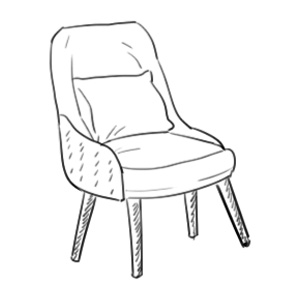

In [31]:
Image("D:\\k-digital\\source\\siamese\\chair\\negative\\s_0006_2920_45349.jpg")

In [32]:
# Load the second image and preprocess it for VGG
img2 = utils.load_img("D:\\k-digital\\source\\siamese\\chair\\negative\\s_0006_2920_45349.jpg", target_size=(224, 224))
img2 = utils.img_to_array(img2)
img2 = np.expand_dims(img2, axis=0)
img2 = preprocess_input(img2)

In [33]:
# Extract features from the second image
features2 = model.predict(img2)
features2 = features2.flatten()

In [34]:
# Calculate the cosine similarity between the two feature vectors
cosine_similarity = np.dot(features1, features2) / (np.linalg.norm(features1) * np.linalg.norm(features2))

## negative

In [35]:
print("Cosine similarity: ", cosine_similarity)

Cosine similarity:  0.3264554


# 함수

In [42]:
def cos_sim(list, mod='positive'):
    positive_sim=[]
    negative_sim=[]
    for i in (list):
        img2 = utils.load_img(i, target_size = (224, 224))
        img2 = utils.img_to_array(img2)
        img2 = np.expand_dims(img2, axis=0)
        img2 = preprocess_input(img2)
        features2 = model.predict(img2)
        features2 = features2.flatten()
        cos_similarity = np.dot(features1, features2) / (np.linalg.norm(features1) * np.linalg.norm(features2))
        if mod == 'positive':
            positive_sim.append(cos_similarity)
        elif mod == 'negative':
            negative_sim.append(cos_similarity)
        else:
            print('함수 잘못 사용함')
    if mod == 'positive':
        print('POSITIVE')
        posi_sim_df = pd.DataFrame(positive_sim)
        print('최대 유사도: %.2f, 최소 유사도: %.2f, 평균 유사도: %.2f, 중앙 유사도: %.2f' %(max(positive_sim), min(positive_sim),
                                                                   (sum(positive_sim)/len(positive_sim)), posi_sim_df.median()))
        posi_sim_df.to_csv('positive.csv')
        return posi_sim_df
    else:
        print('NEGATIVE')
        nega_sim_df = pd.DataFrame(negative_sim)
        print('최대 유사도: %.2f, 최소 유사도: %.2f, 평균 유사도: %.2f, 중앙 유사도: %.2f' %(max(negative_sim), min(negative_sim),
                                                                   (sum(negative_sim)/len(negative_sim)), nega_sim_df.median()))
        nega_sim_df.to_csv('negative.csv')
        return nega_sim_df

In [58]:
nega_dir = 'D:\\k-digital\\source\\siamese\\chair\\negative'
posi_dir = 'D:\\k-digital\\source\\siamese\\chair\\positive'

nega_list = [nega_dir+'\\'+f for f in(ld(nega_dir))]
posi_list = [posi_dir+'\\'+f for f in(ld(posi_dir))]

In [46]:
print(nega_list[0])
print(posi_list[0])

D:\k-digital\source\siamese\chair\negative\s_0006_2920_306065.jpg
D:\k-digital\source\siamese\chair\positive\s_0007_24787_427588.jpg


In [49]:
cos_sim(nega_list, 'negative')

NEGATIVE
최대 유사도: 0.49, 최소 유사도: 0.05, 평균 유사도: 0.27, 중앙 유사도: 0.26


,0
0,0.402483
1,0.391576
2,0.326455
3,0.360008
4,0.356712
...,...
562,0.300009
563,0.238452
564,0.262638
565,0.292602


In [59]:
cos_sim(posi_list)

POSITIVE
최대 유사도: 0.79, 최소 유사도: 0.15, 평균 유사도: 0.36, 중앙 유사도: 0.32


,0
0,0.269580
1,0.296953
2,0.280977
3,0.278411
4,0.338936
...,...
667,0.701230
668,0.437918
669,0.612123
670,0.623135


직접 그린 이미지

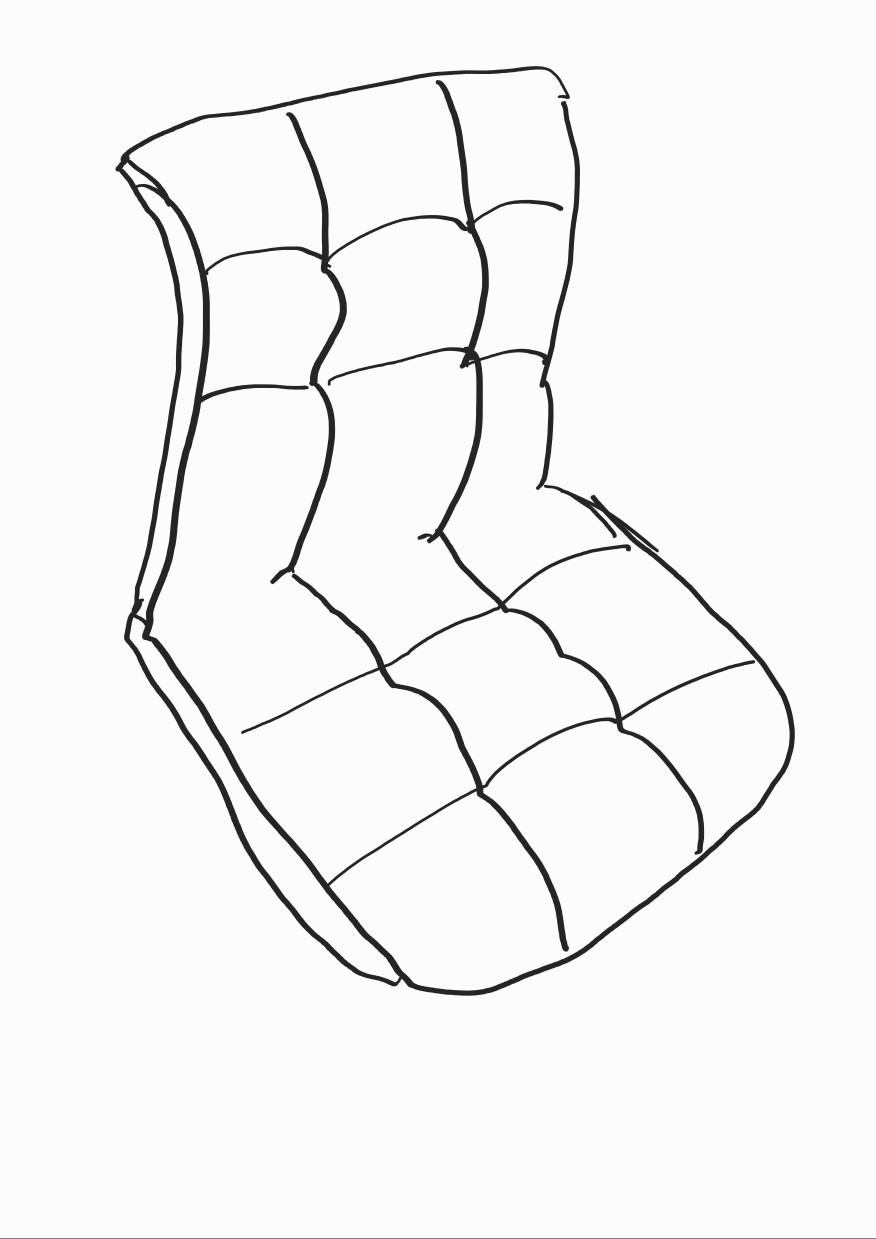

In [54]:
Image("D:\\k-digital\\source\\siamese\\chair\\test\\chair1.jpg")

In [60]:
img2 = utils.load_img("D:\\k-digital\\source\\siamese\\chair\\test\\chair1.jpg", target_size=(224, 224))
img2 = utils.img_to_array(img2)
img2 = np.expand_dims(img2, axis=0)
img2 = preprocess_input(img2)

In [61]:
features2 = model.predict(img2)
features2 = features2.flatten()

In [62]:
cosine_similarity = np.dot(features1, features2) / (np.linalg.norm(features1) * np.linalg.norm(features2))

In [63]:
print("Cosine similarity: ", cosine_similarity)

Cosine similarity:  0.43845537


In [64]:
p_df = pd.read_csv("D:\\k-digital\\source\\siamese\\chair\\positive.csv")
p_df.nunique()

Unnamed: 0    672
0             503
dtype: int64

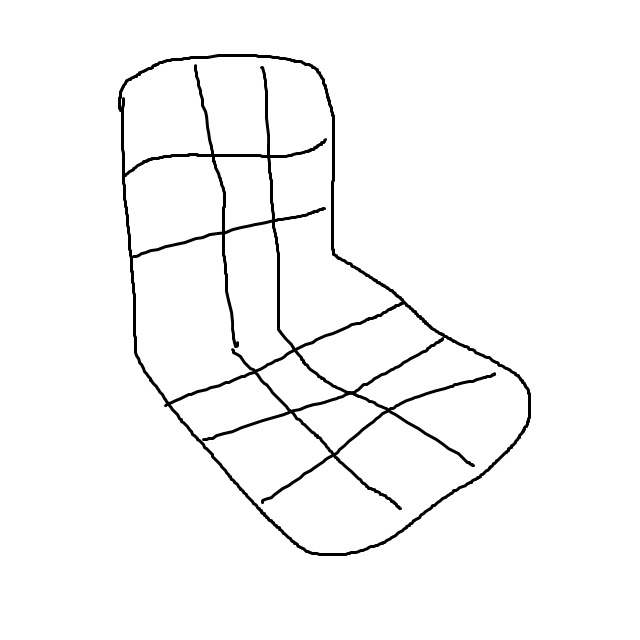

In [65]:
Image('D:\\k-digital\\source\\siamese\\chair\\test\\chair2.jpg')

In [66]:
img2 = utils.load_img("D:\\k-digital\\source\\siamese\\chair\\test\\chair2.jpg", target_size=(224, 224))
img2 = utils.img_to_array(img2)
img2 = np.expand_dims(img2, axis=0)
img2 = preprocess_input(img2)
features2 = model.predict(img2)
features2 = features2.flatten()
cosine_similarity = np.dot(features1, features2) / (np.linalg.norm(features1) * np.linalg.norm(features2))
print("Cosine similarity: ", cosine_similarity)

Cosine similarity:  0.58237207
